### About the Data

**Name:** Amazon top 50 Bestselling Books List from 2009 to 2019

The dataset was collected from [Kaggle](https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019). I manually added the Gender column and have uploaded the modified data to [ my Github account](https://github.com/suha98/Analysis-of-Amazon-Bestselling-Books-2009-2019)

In [1]:
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [2]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df = pd.read_csv('/kaggle/input/amazon-bestselling-books-20092019-with-gender/bestsellers with categories.csv')

/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv
/kaggle/input/amazon-bestselling-books-20092019-with-gender/bestsellers with categories.csv


In [3]:
#There are no missing values in the data

df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
Gender         0
dtype: int64

In [4]:
#Looking at the genre types and the time data

print(df['Genre'].unique())
print(df['Year'].unique())

['Fiction' 'Non Fiction']
[2010 2011 2017 2019 2016 2009 2014 2013 2012 2015 2018]


## Possible Analyses

There are many possible analyses that could be conducted from this dataset. I've written some suggestions below and have displayed my findings.

1. Distribution of Male and Female authors in ten years
2. Distribution of Fiction and Non-Fiction Works in 10 Years
3. Correlation between number of reviews and price according to males and females - does more reviews mean higher price?
5. Distribution of Gender and Number of Reviews
6. Distribution of review ratings according to year
7. Does a book name with more words mean higher rating/reviews/price? Is it on the bestseller list for longer?
8. Books that have been on the bestselling list more than once and their characteristics. Did the price go up? Are most of these books fiction or non-fiction? Were most of the writers male or female?



## Calculations

Calculating the percentage of male and female bestselling authors



In [5]:
#Making a subset of the dataframe by grouping the rows by gender
df_gender = pd.DataFrame(df.groupby(['Year', 'Gender']).size().reset_index())

#converts the wide-form data to longform
df_gender= df_gender.pivot(index=['Year'], columns=['Gender'], values=0)

#creating the column for percentages
df_gender['female %'] = (df_gender['Female']/50)*100
df_gender['male %'] = (df_gender['Male']/50)*100


df_gender

Gender,Company,Female,Male,female %,male %
Year,,,,,
2009,2,16,32,32.0,64.0
2010,3,11,36,22.0,72.0
2011,3,16,31,32.0,62.0
2012,3,19,28,38.0,56.0
2013,4,14,32,28.0,64.0
2014,8,13,29,26.0,58.0
2015,8,17,25,34.0,50.0
2016,7,24,19,48.0,38.0
2017,5,16,29,32.0,58.0


Extracting data of authors who were on the bestseller list multiple times over the years

In [6]:
#finding the number of times an author is on the list
df_authors = df.groupby('Author').size().reset_index().rename(columns = {0:'Number of times on list'})
#only keeping the authors who appeared twice or more
df_authors = df_authors.loc[df_authors['Number of times on list']>=2].reset_index(drop = True)

#merging these author names with the original dataframe
repeat_authors = df.merge(df_authors, how = 'inner', on = 'Author')
#only keeping the columns I need
repeat_authors = repeat_authors[['Author', 'Gender', 'Number of times on list']]
#removing duplicates
repeat_authors = repeat_authors.loc[repeat_authors.duplicated()==False]
#making the field a string
repeat_authors['Number of times on list'] = repeat_authors['Number of times on list'].astype(str)
repeat_authors

,Author,Gender,Number of times on list
0,Abraham Verghese,Male,2
2,American Psychiatric Association,Company,2
4,American Psychological Association,Company,10
14,Amy Ramos,Female,2
16,Ann Voskamp,Female,2
...,...,...,...
408,Walter Isaacson,Male,3
411,William Davis,Male,2
413,William P. Young,Male,2
415,Wizards RPG Team,Company,3


In [7]:
#adding columns for number of words and characters in the book title

num_of_words = []
num_of_chars = []
for name in df['Name']:
  num_of_chars.append(len(name))
  name = name.split(' ')
  num_of_words.append(len(name))

df['Number of words'] = num_of_words
df['Number of chars'] = num_of_chars

## Visualizations

##### **Distribution of Male and Female authors over time**

Comments:
1. The percentage of bestselling male authors was approximately double the percentage of bestselling females authors in 2009
2. The only year that there were more bestselling female authors was in 2016
3. The disparity had been decreasing over the years. In 2019, there are 5% more male authors than females which is far smaller than the 35% in 2009


<AxesSubplot:title={'center':'Percentage of males and females on the bestseller list from 2009-2019'}, xlabel='Year', ylabel='Percentage'>

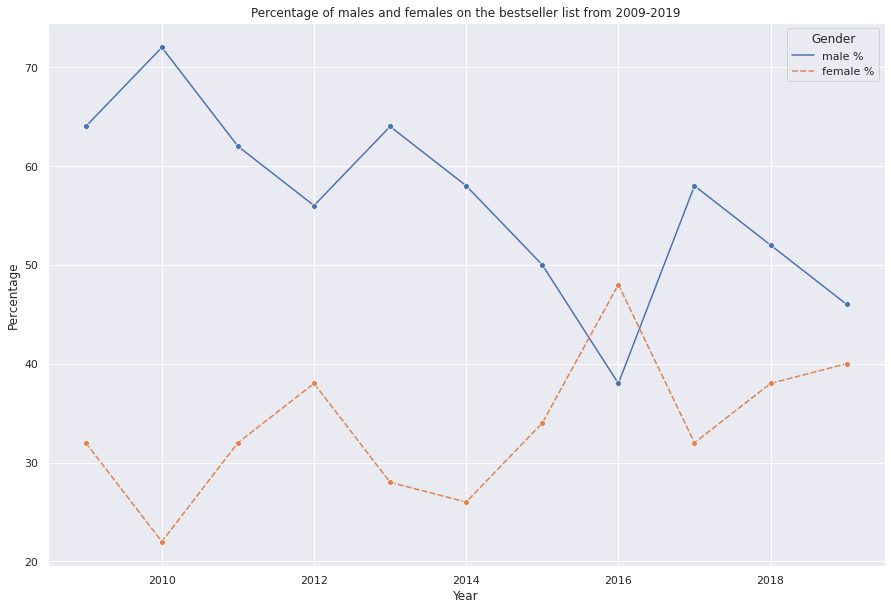

In [8]:
sns.set_theme()
plt.figure(figsize=(15,10))
plt.title('Percentage of males and females on the bestseller list from 2009-2019')
plt.xlabel('Year')
plt.ylabel('Percentage')
sns.lineplot(data = df_gender[['male %', 'female %']], marker = 'o')

##### **Number of fiction/non-fiction books by gender over time**

Comments: 
- There were more non-fiction books than fiction in most years
- The number of male non-fiction writers decreased
- The number of female non-fiction writers increased
- Books with company authors were mostly non-fiction
- The number of male fiction writers remained relatively constant whereas the number of females decreased

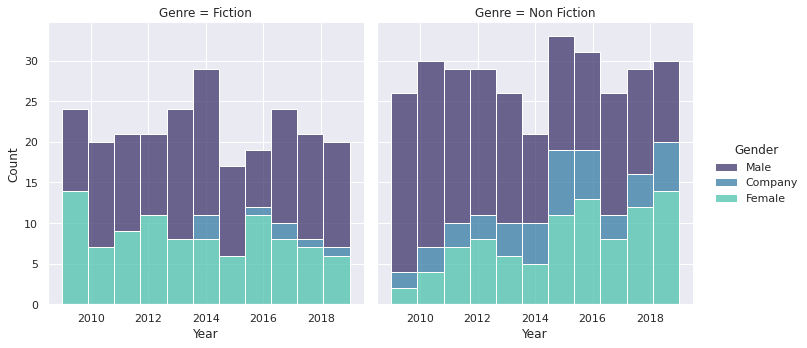

In [9]:
sns.set_theme()
sns.displot(df, x="Year", hue = 'Gender', palette = 'mako', multiple = 'stack',col = 'Genre')


##### **User Rating of Amazon Bestselling Books over time**

With time, it appears that books with a higher user rating became bestsellers.

<AxesSubplot:title={'center':'User Rating of Amazon Bestselling Books from 2009-2019'}, xlabel='Year', ylabel='User Rating'>

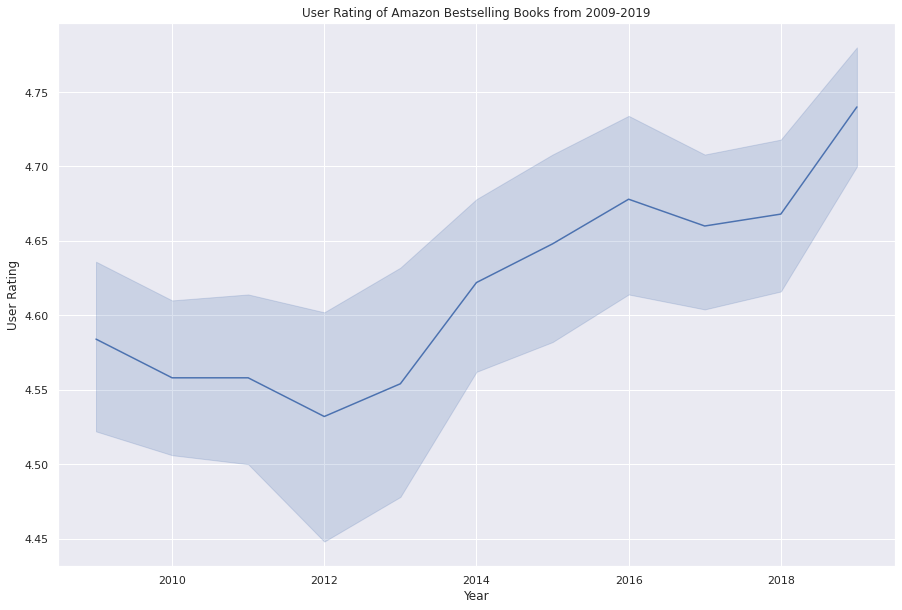

In [10]:
sns.set_theme()
plt.figure(figsize=(15,10))
plt.title('User Rating of Amazon Bestselling Books from 2009-2019')
plt.xlabel('Year')
plt.ylabel('User Rating')
sns.lineplot(data=df, x="Year", y='User Rating')



##### **Creating word clouds of the book names according to genre**

I wanted to see which words were the most frequent in the bestselling book titles over the past ten years. In the following section, I generated word clouds for the fiction and non-fiction novels to do this.

In [11]:
#This creates two strings of text by extracting and joining all of the titles from the dataframes

fiction = " ".join(name for name in df.loc[df['Genre']=='Fiction'].Name)
nonfiction = " ".join(name for name in df.loc[df['Genre']!='Fiction'].Name)

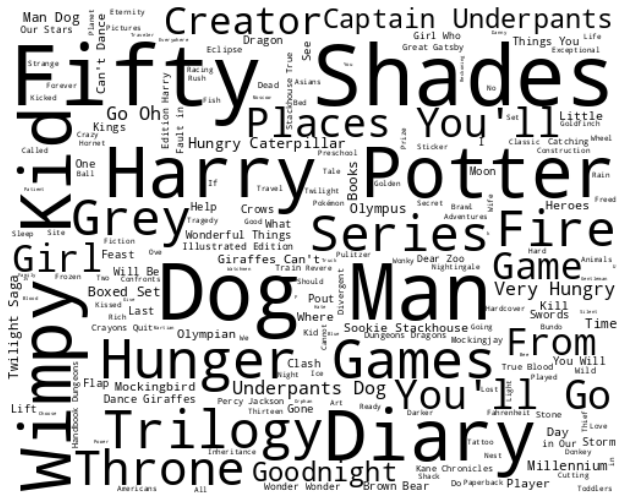

In [12]:
#generating the wordcloud for the fiction titles
wordcloud = WordCloud(stopwords=['on', 'to', 'of', 'a', 'an', 'the', 'book', 'novel', 'and', 'with', 'for'], background_color="white",  color_func=lambda *args, **kwargs: "black", max_font_size=120, width = 500, height = 400).generate(fiction)
plt.figure(figsize = (11,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

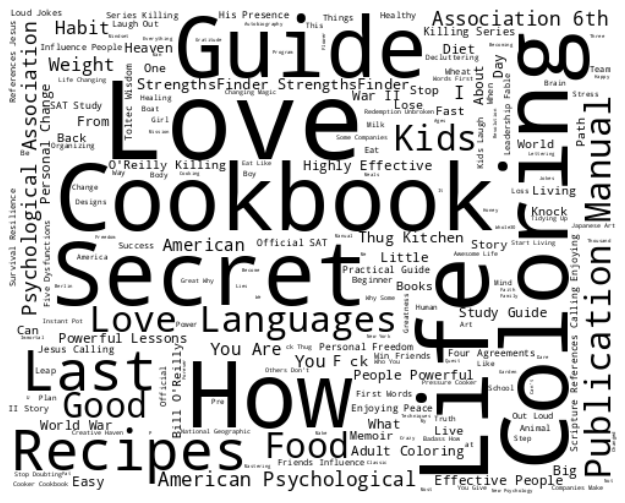

In [13]:
#generating the worldcloud for the non-fiction titles
wordcloud = WordCloud(stopwords=['on', 'to', 'of', 'a', 'an', 'in', 'the', 'book', 'novel', 'and', 'with', 'for', 'Edition', 'Your', 'That'],  background_color="white",  color_func=lambda *args, **kwargs: "black", max_font_size=90, width = 500, height = 400).generate(nonfiction)
plt.figure(figsize = (11,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### **Prices of the books with time, split by gender**

Comments: 

The median prices of the male fiction novels in the bestseller list decreased over time. The female-authored non-fiction novel prices decreased as well, but very slightly. The variation in the prices has gotten smaller for both categories.

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


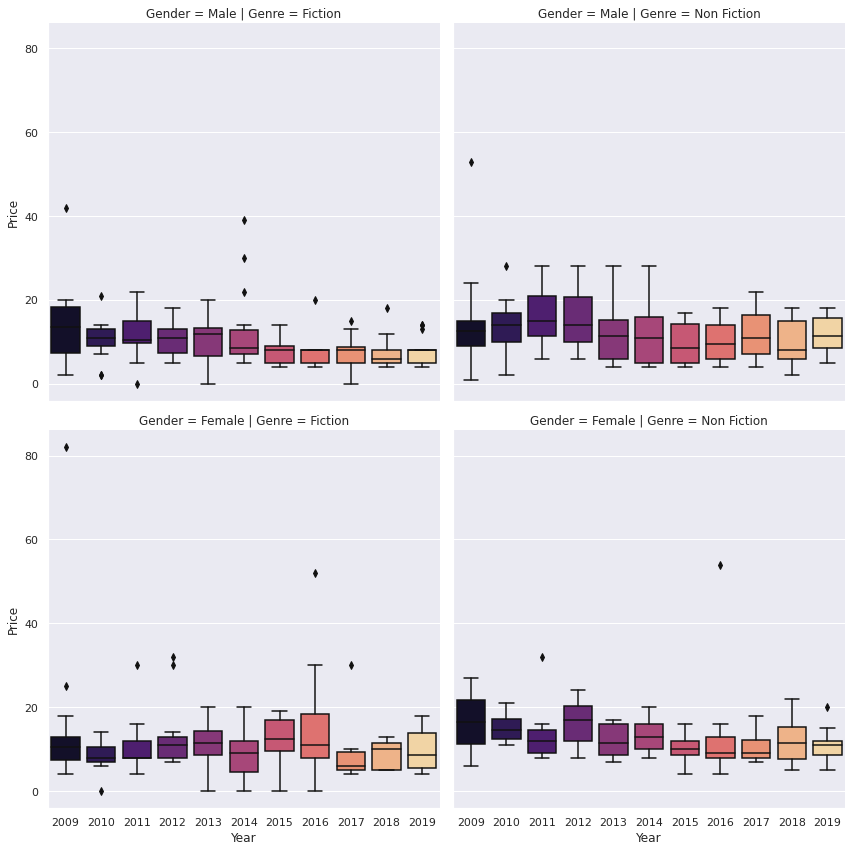

In [14]:
g = sns.FacetGrid(df.loc[df['Gender']!='Company'], col="Genre", row = 'Gender', height=6, aspect = 1)
g.map(sns.boxplot, "Year", "Price",  palette = 'magma')


In [15]:
df

,Name,Author,User Rating,Reviews,Price,Year,Genre,Gender,Number of words,Number of chars
0,Cutting for Stone,Abraham Verghese,4.6,4866,11,2010,Fiction,Male,3,17
1,Cutting for Stone,Abraham Verghese,4.6,4866,11,2011,Fiction,Male,3,17
2,Milk and Vine: Inspirational Quotes From Class...,Adam Gasiewski,4.4,3113,6,2017,Non Fiction,Male,8,54
3,Go the F**k to Sleep,Adam Mansbach,4.8,9568,9,2011,Fiction,Male,5,20
4,What Should Danny Do? (The Power to Choose Ser...,Adir Levy,4.8,8170,13,2019,Fiction,Male,9,50
...,...,...,...,...,...,...,...,...,...,...
545,Player's Handbook (Dungeons & Dragons),Wizards RPG Team,4.8,16990,27,2017,Fiction,Company,5,38
546,Player's Handbook (Dungeons & Dragons),Wizards RPG Team,4.8,16990,27,2018,Fiction,Company,5,38
547,Player's Handbook (Dungeons & Dragons),Wizards RPG Team,4.8,16990,27,2019,Fiction,Company,5,38
548,Divine Soul Mind Body Healing and Transmission...,Zhi Gang Sha,4.6,37,6,2009,Non Fiction,Male,19,115


##### **Number of times authors appeared on the list according to gender**

The graph dislays the number of authors who appeared twice, thrice, etc. on the Amazon bestseller list over the ten years. Since there are more male authors than females in the dataset, in the majority of cases they outnumber them. In two cases this differs: more females appeared on the bestseller list 4 and 6 times over the time duration. 

<AxesSubplot:title={'center':'Number of times authors were on the bestseller list according to gender'}, xlabel='Number of times on list', ylabel='Number of authors'>

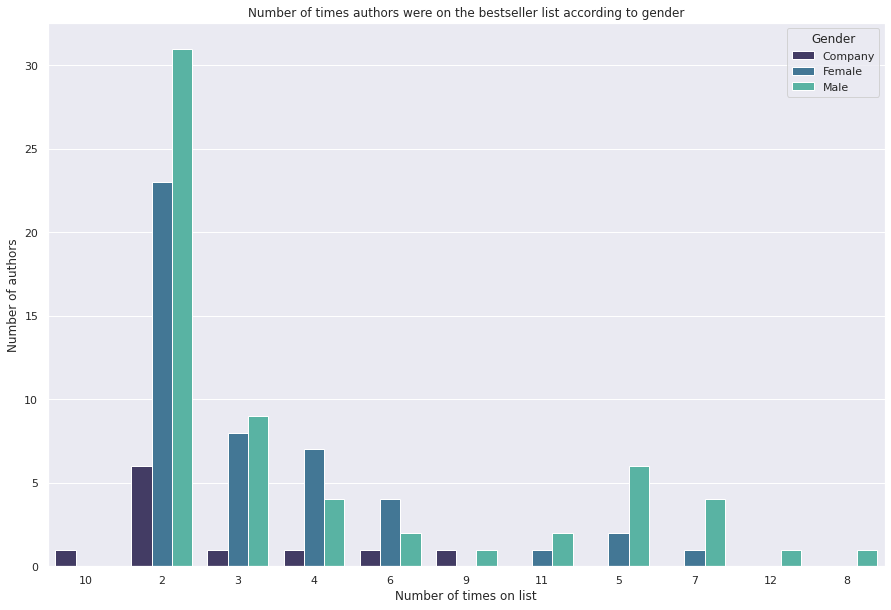

In [16]:
plt.figure(figsize = (15,10))
plt.title('Number of times authors were on the bestseller list according to gender')
sns.barplot(data = repeat_authors.groupby(['Gender','Number of times on list']).size().reset_index().rename(columns = {0: 'Number of authors'}), x='Number of times on list', y = 'Number of authors', hue = 'Gender', palette = 'mako')



##### **Correlation between title length and number of reviews**

I wanted to see if more people read books with longer titles; from the graph, despite a few outliers, it looks like they do not.

<AxesSubplot:title={'center':'Correlation between title length and number of reviews'}, xlabel='Number of words in title', ylabel='Number of reviews'>

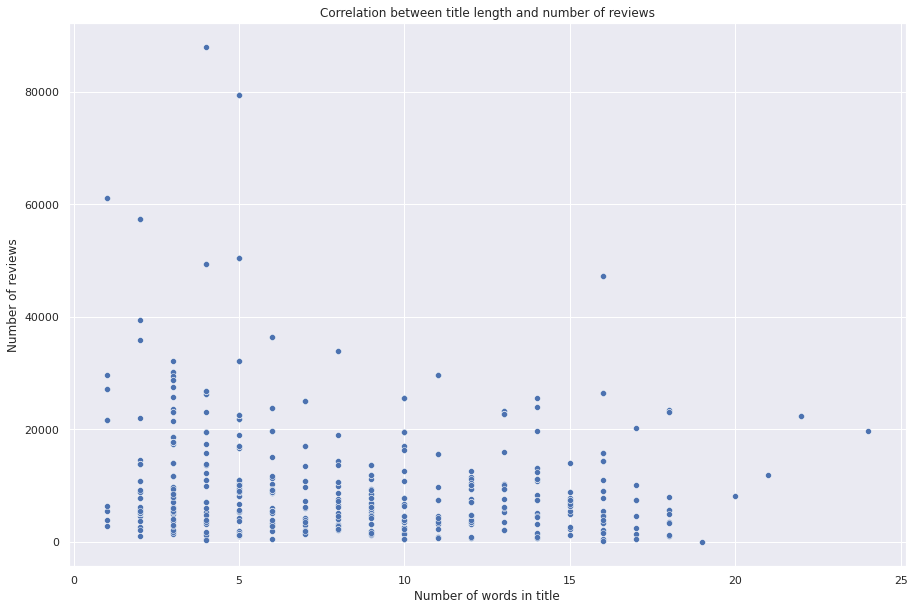

In [17]:
sns.set_theme()
plt.figure(figsize=(15,10))
plt.title('Correlation between title length and number of reviews')
plt.xlabel('Number of words in title')
plt.ylabel('Number of reviews')
sns.scatterplot(data=df, x="Number of words", y='Reviews')

